In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from typing import List, Tuple

In [2]:
%pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Lire l’image flower.jpg en niveau de gris via cv2,

In [3]:
def read_grayscale_image(file_path) -> np.ndarray:
    # Lire l'image en niveaux de gris
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return img


def show_image(img: np.ndarray) -> None:
    plt.imshow(img)

In [4]:
img = read_grayscale_image("figs\\flower.png")
img.shape

(318, 396)

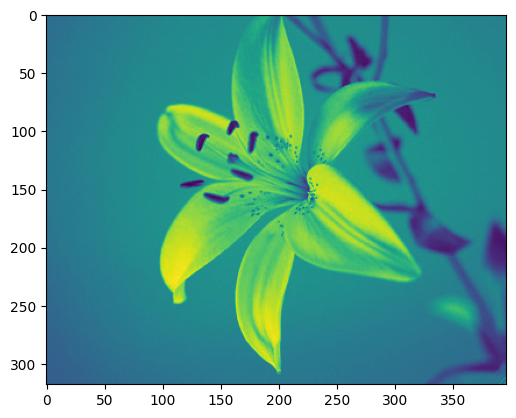

In [5]:
show_image(img)

Appliquer le filtre moyenné pour différentes valeurs de taille
de filtre (3,7,11) avec padding nécessaire pour conserver la dimension initiale de l’image

In [6]:
from tools import Conv2D, add_padding

In [7]:
# adding padding
padding = img.shape
padding

(318, 396)

In [8]:
padded_img = add_padding(img, padding=padding)
print(f"THE SHAPE OF THE ORIGINAL IMAGE IS {img.shape}")
print(f"THE SHAPE OF THE PADDED IMAGE IS {padded_img.shape}")

THE SHAPE OF THE ORIGINAL IMAGE IS (318, 396)
THE SHAPE OF THE PADDED IMAGE IS (954, 1188)


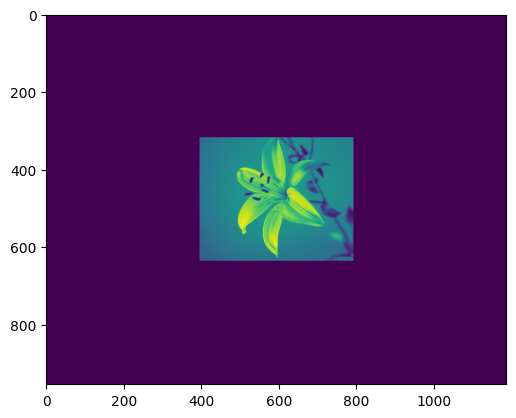

In [9]:
show_image(padded_img)

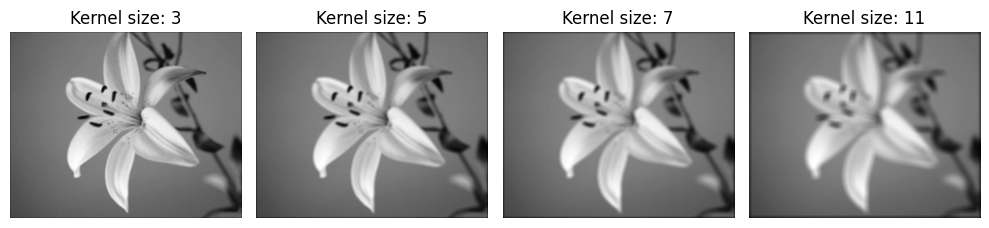

In [32]:
k = [3, 5, 7, 11]

fig, axes = plt.subplots(1, 4, figsize=(10, 10))

for i, ax in zip(k, axes.flatten()):
    kernel = np.ones((i, i)) / (i * i)
    conv_img = Conv2D(add_padding(img, ((i - 1) // 2, i // 2)), kernel=kernel)
    ax.imshow(conv_img, cmap="gray")
    ax.set_title(f"Kernel size: {i}")
    ax.axis("off")

plt.tight_layout()
plt.show()

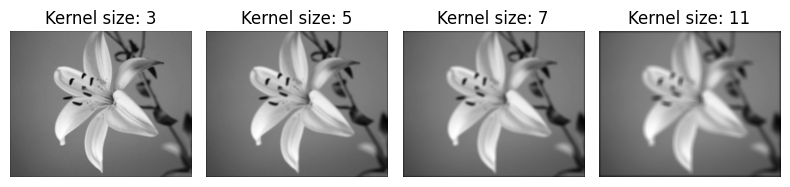

In [35]:
# with the padding argument from Conv2D
# this is the box kernel
k = [3, 5, 7, 11]
fig, axes = plt.subplots(1, 4, figsize=(8, 8))

for i, ax in zip(k, axes.flatten()):
    kernel = np.ones((i, i)) / (i * i)
    conv_img = Conv2D(img, padding=((i - 1) // 2, i // 2), kernel=kernel)
    ax.imshow(conv_img, cmap="gray")
    ax.set_title(f"Kernel size: {i}")
    ax.axis("off")

plt.tight_layout()
plt.show()

We apply the box kernel

In [10]:
kernel = np.ones((9, 9), dtype=np.float32) / 9
stride = (1, 1)
dilation = (1, 1)
padding = (1, 1)
padding_ = img.shape
# Apply convolution
# conv_img = Conv2D(matrix=img, padding=padding, kernel=kernel)
conv_img = Conv2D(add_padding(img, padding_), kernel=kernel)

In [11]:
conv_img.shape

(946, 1180)

In [12]:
img.shape

(318, 396)

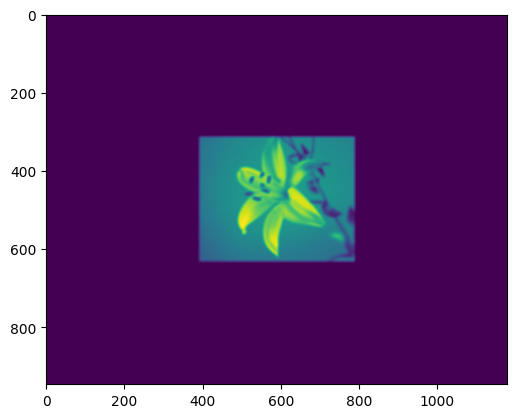

In [13]:
show_image(conv_img)

Appliquer le filtre moyenner pour différentes valeurs de taille
de filtre (3,7,11) avec padding nécessaire pour conserver la dimension initiale de l’image

In [14]:
def apply_filter(
    image: np.ndarray, filter_size: int, padding: Tuple[int, int]
) -> np.ndarray:
    # Création du filtre moyenneur
    kernel = np.ones((filter_size, filter_size)) / (filter_size * filter_size)

    # Application du padding
    padded_image = np.pad(image, padding, mode="constant")

    # Application de la convolution avec le filtre et le padding spécifiés
    convolved_image = Conv2D(padded_image, kernel, padding=padding)

    return convolved_image

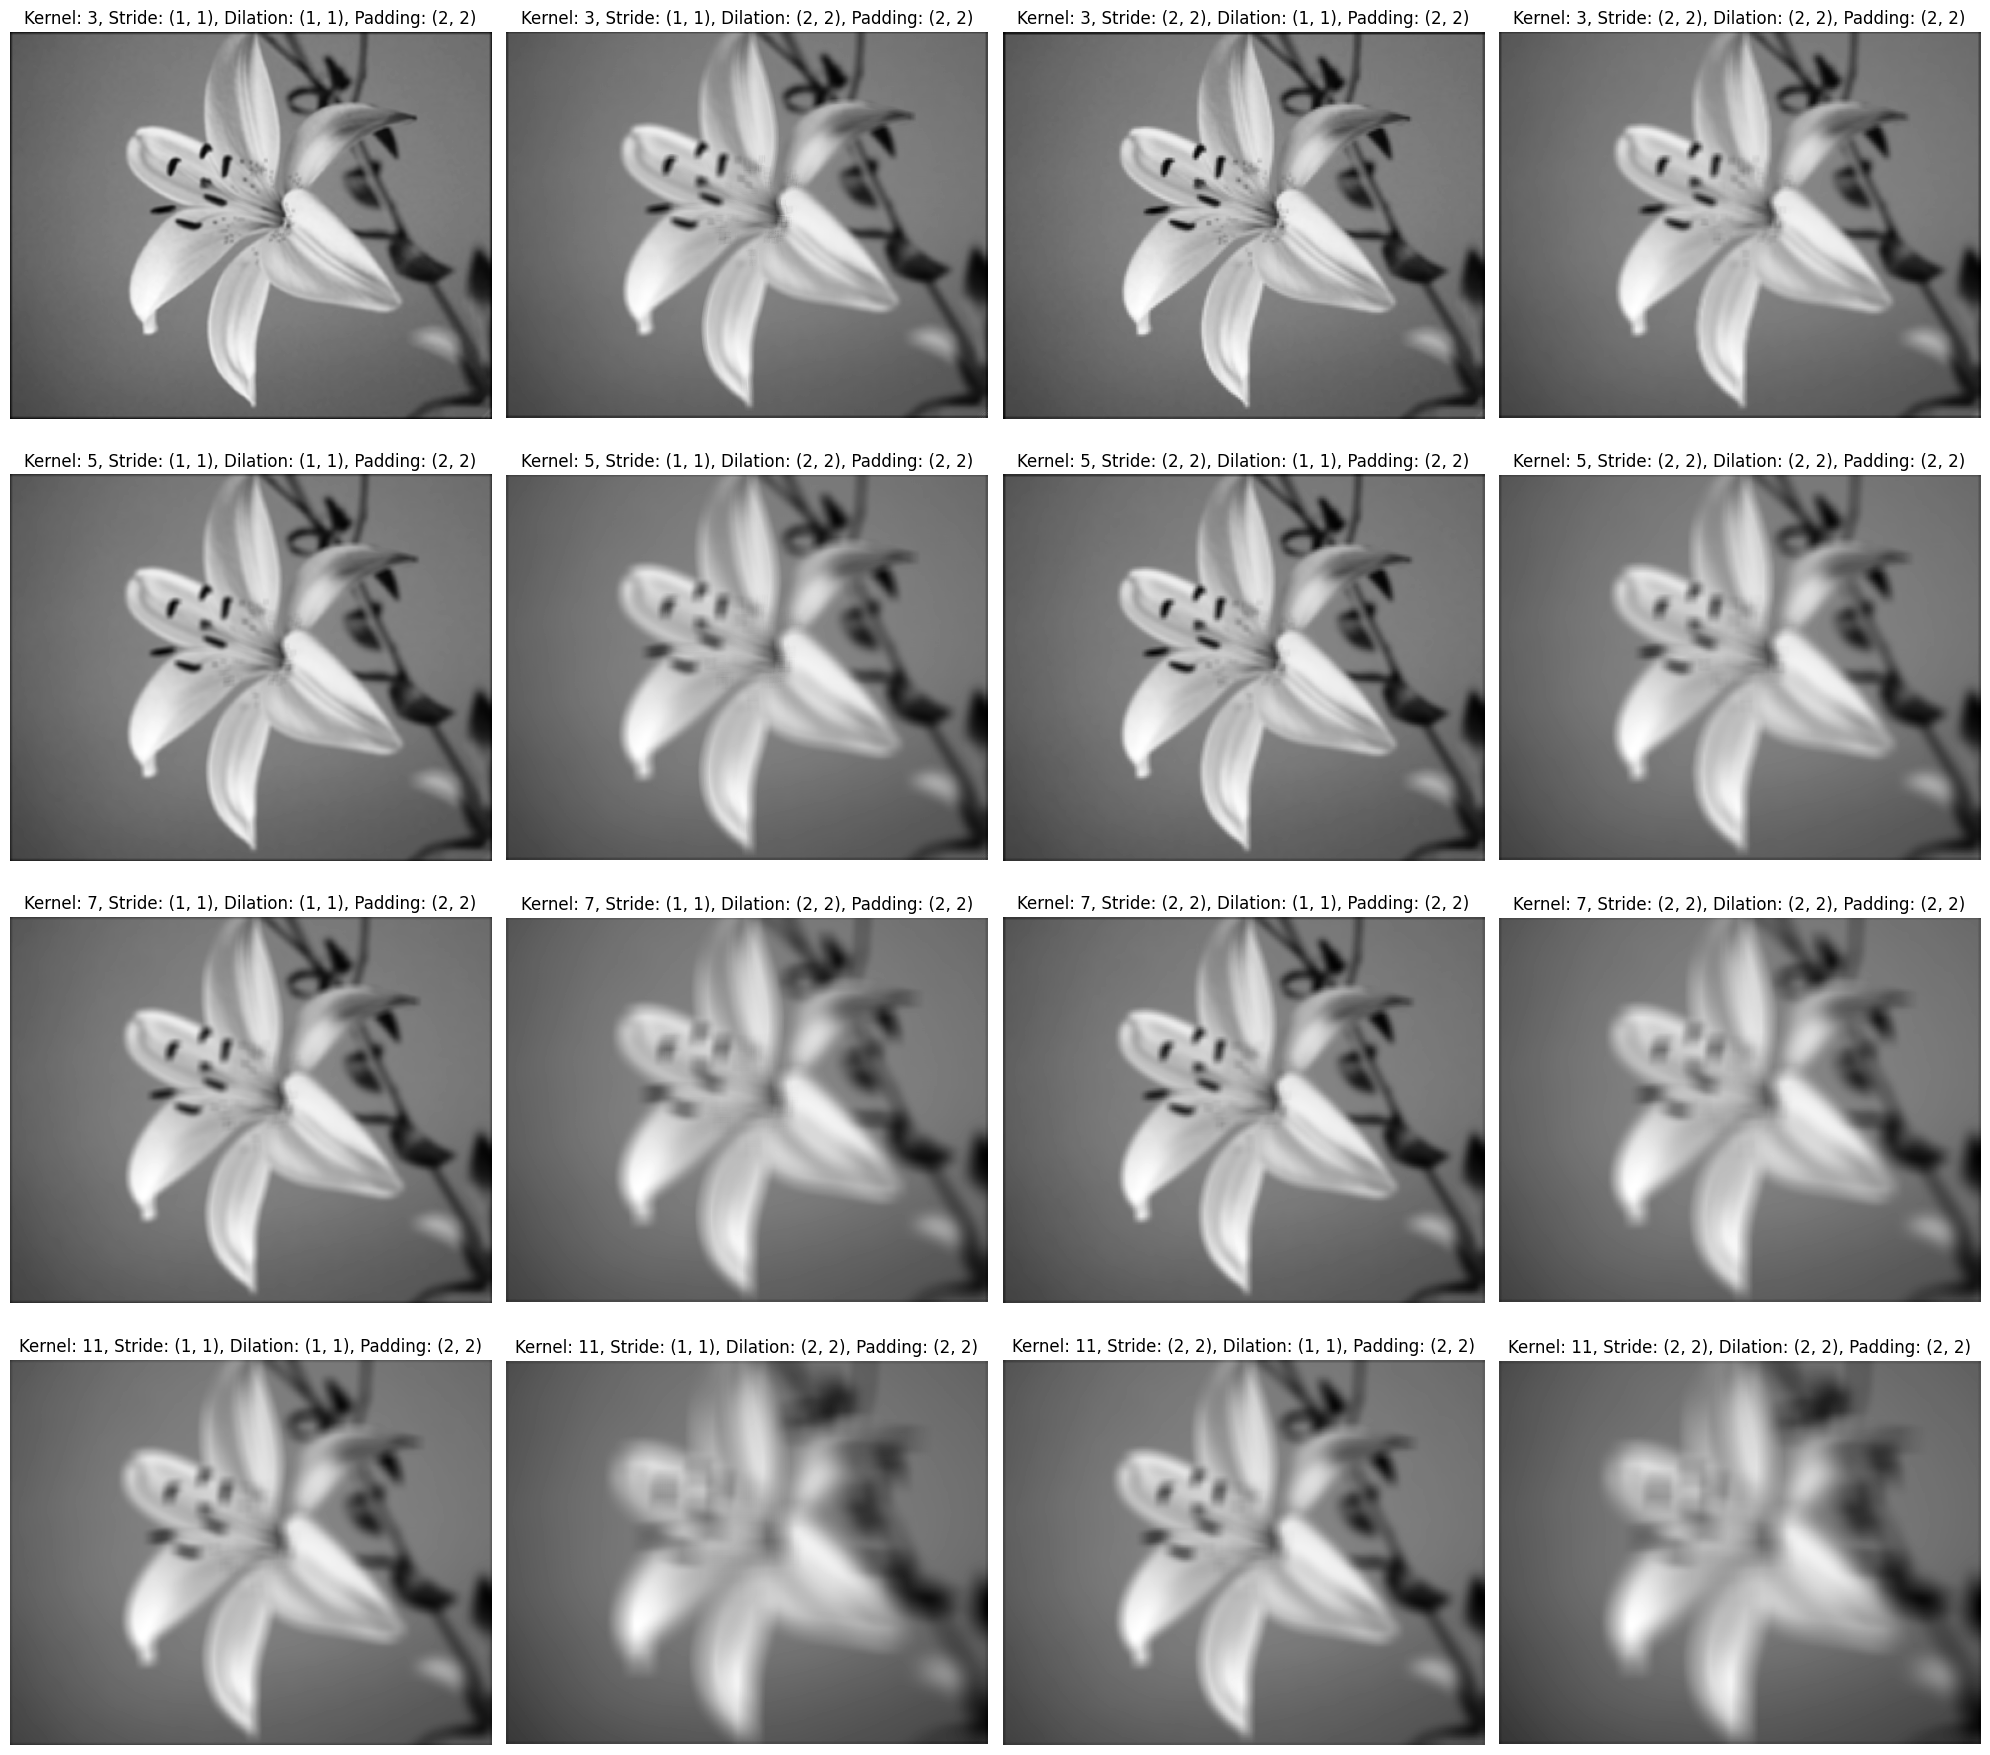

In [36]:
kernel_sizes = [3, 5, 7, 11]
strides = [(1, 1), (2, 2)]
dilations = [(1, 1), (2, 2)]
paddings = [(1, 1), (2, 2)]

fig, axes = plt.subplots(
    len(kernel_sizes), len(strides) * len(dilations), figsize=(20, 18)
)

for i, kernel_size in enumerate(kernel_sizes):
    for j, stride in enumerate(strides):
        for k, dilation in enumerate(dilations):
            for l, padding in enumerate(paddings):
                kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (
                    kernel_size * kernel_size
                )
                conv_img = Conv2D(
                    matrix=img,
                    kernel=kernel,
                    stride=stride,
                    dilation=dilation,
                    padding=padding,
                )
                axes[i, j * len(dilations) + k].imshow(conv_img, cmap="gray")
                axes[i, j * len(dilations) + k].set_title(
                    f"Kernel: {kernel_size}, Stride: {stride}, Dilation: {dilation}, Padding: {padding}"
                )
                axes[i, j * len(dilations) + k].axis("off")

plt.tight_layout()
plt.show()

In [16]:
tailles_filtre = [3, 7, 11]
strides = [2, 5, 11]
dilatations = [1, 3, 5]

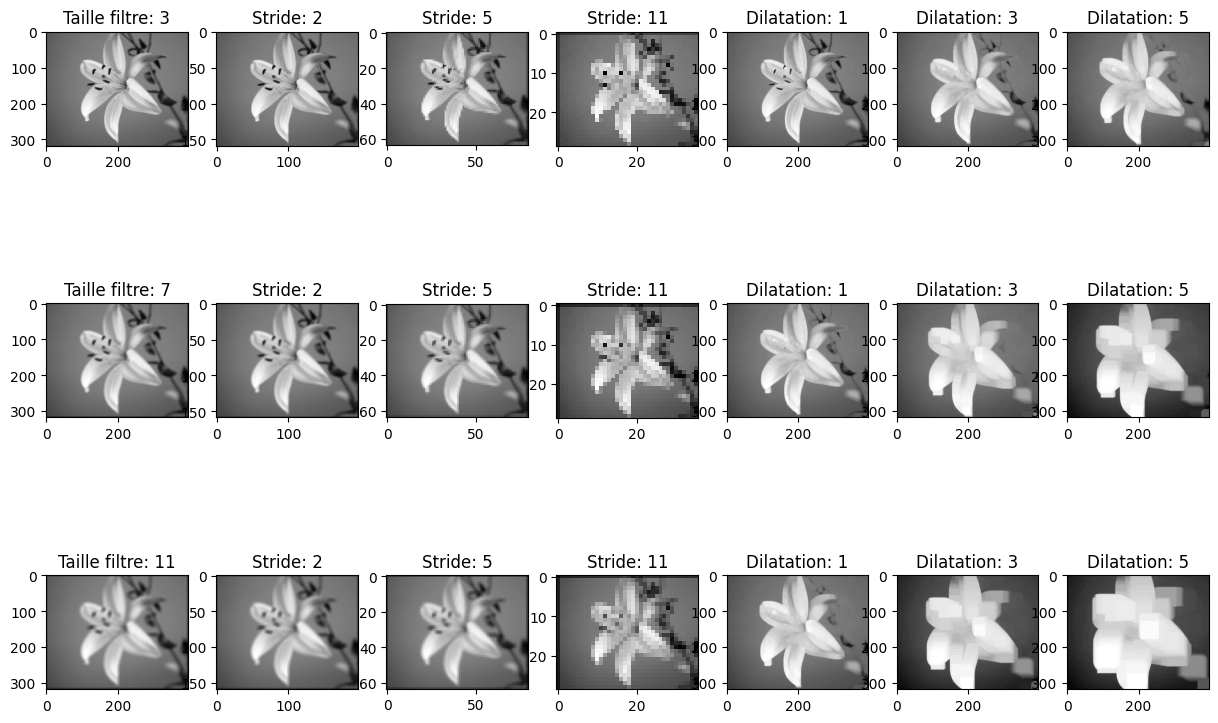

In [17]:
fig, axes = plt.subplots(
    len(tailles_filtre), 1 + len(strides) + len(dilatations), figsize=(15, 10)
)

for i, taille in enumerate(tailles_filtre):
    kernel = np.ones((taille, taille), dtype=np.float32) / (taille * taille)
    conv_img = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)
    axes[i, 0].imshow(conv_img, cmap="gray")
    axes[i, 0].set_title(f"Taille filtre: {taille}")
    for j, stride in enumerate(strides):
        conv_img_______stride = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)
        conv_img_stride = conv_img_stride[::stride, ::stride]
        axes[i, j + 1].imshow(conv_img_stride, cmap="gray")
        axes[i, j + 1].set_title(f"Stride: {stride}")
    for k, dilatation in enumerate(dilatations):
        kernel = np.ones((taille, taille), dtype=np.float32)
        conv_img_dilation = cv2.dilate(img, kernel, iterations=dilatation)
        axes[i, len(strides) + k + 1].imshow(conv_img_dilation, cmap="gray")
        axes[i, len(strides) + k + 1].set_title(f"Dilatation: {dilatation}")

plt.show()

 Automatiser le processus précédant. Créer une fonction pour la construction du filtre moyenneur à
l’instar de la fonction gaussian_mask. Faire une fonction filter_analysis qui prend en entrée une image
et la fonction du filtre souhaité et qui renvoi la figure des comparaisons

In [18]:
def mean_filter(size):
    kernel = np.ones((size, size), dtype=np.float32) / (size * size)
    return kernel


def filter_analysis(image, filter_function, filter_name, filter_args=None):
    if filter_args is None:
        filter_args = {}

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    filtered_image = Conv2D(matrix=image, kernel=filter_function(**filter_args))
    axes[1].imshow(filtered_image, cmap="gray")
    axes[1].set_title(f"Filtered Image ({filter_name})")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

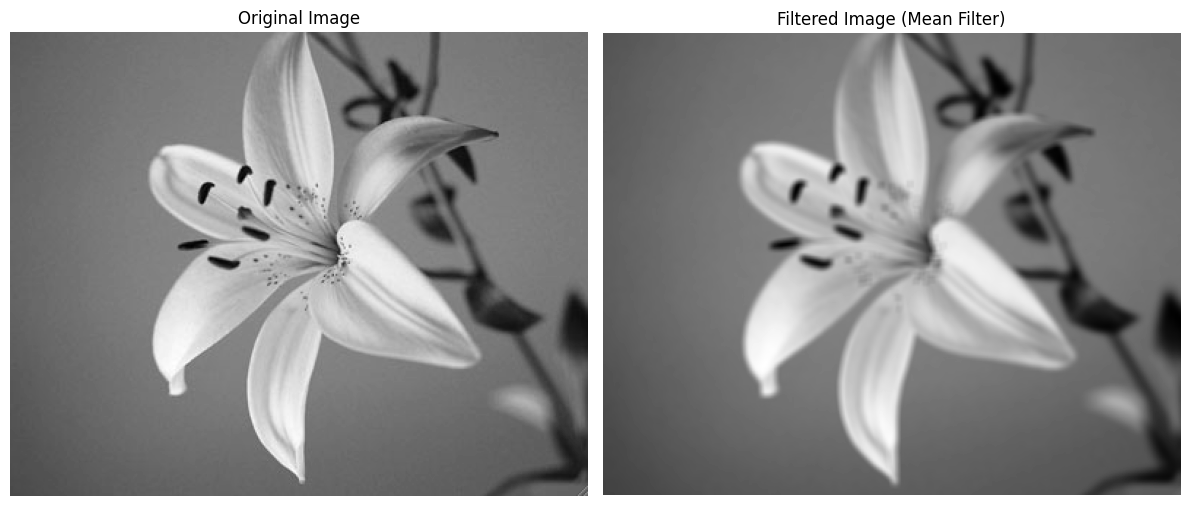

In [19]:
image = read_grayscale_image("figs\\flower.png")
filter_size = 5
filter_analysis(image, mean_filter, "Mean Filter", {"size": filter_size})

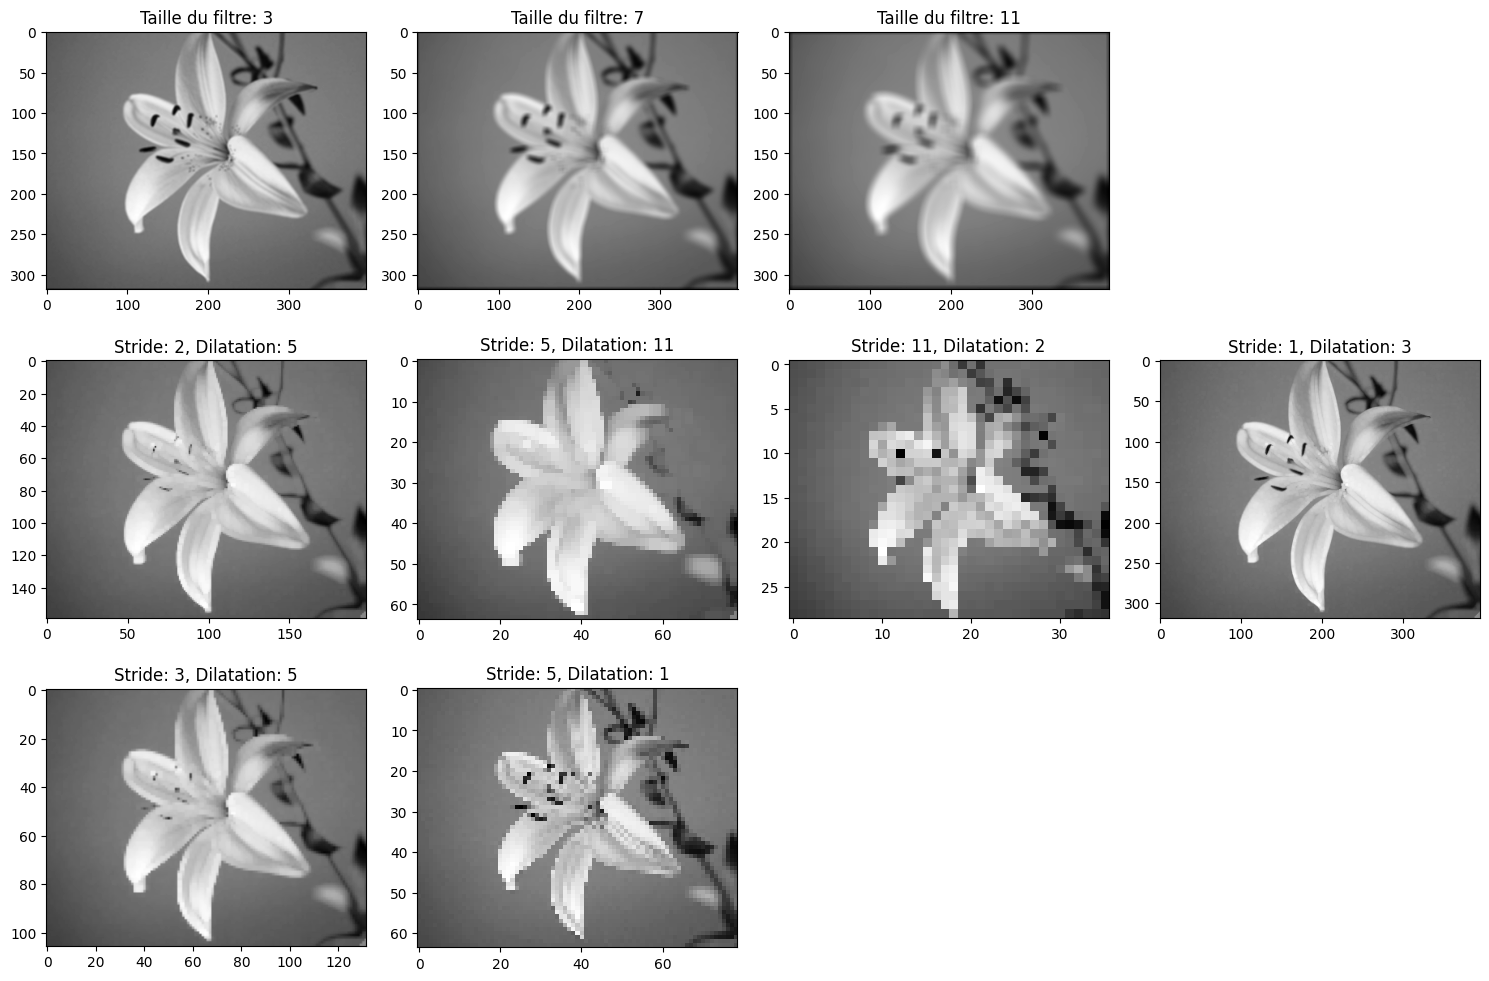

In [20]:
# Définir les tailles de filtre et de stride/dilatation
tailles_filtre = [3, 7, 11]
strides_dilatations = [(2, 5), (5, 11), (11, 2), (1, 3), (3, 5), (5, 1)]


plt.figure(figsize=(15, 10))


# Fonction de convolution avec padding
def convolution(image, taille_filtre):
    return cv2.filter2D(
        image,
        -1,
        np.ones((taille_filtre, taille_filtre), np.float32)
        / (taille_filtre * taille_filtre),
        borderType=cv2.BORDER_CONSTANT,
    )


# Appliquer les filtres moyenneurs pour différentes valeurs de taille de filtre
for i, taille_filtre in enumerate(tailles_filtre):
    filtered_image = convolution(image, taille_filtre)
    plt.subplot(3, 4, i + 1)
    plt.imshow(filtered_image, cmap="gray")
    plt.title(f"Taille du filtre: {taille_filtre}")

# Appliquer le stride et la dilatation sans padding
for i, (stride, dilatation) in enumerate(strides_dilatations):
    filtered_image = cv2.dilate(
        image, np.ones((dilatation, dilatation), np.uint8), iterations=1
    )
    filtered_image = cv2.resize(
        filtered_image,
        None,
        fx=1 / stride,
        fy=1 / stride,
        interpolation=cv2.INTER_NEAREST,
    )
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(filtered_image, cmap="gray")
    plt.title(f"Stride: {stride}, Dilatation: {dilatation}")

plt.tight_layout()
plt.show()

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def average_filter(size):
    return np.ones((size, size), dtype=np.float32) / (size * size)


def filter_analysis(image, filter_function, filter_sizes):
    fig, axes = plt.subplots(len(filter_sizes), len(filter_sizes), figsize=(12, 12))

    for i, size in enumerate(filter_sizes):
        for j, dilation in enumerate(filter_sizes):
            # Apply the filter with the specified size
            filtered_image = cv2.filter2D(image, -1, filter_function(size))
            axes[i, j].imshow(filtered_image, cmap="gray")
            axes[i, j].set_title(f"Size: {size}, Dilation: {dilation}")
            axes[i, j].axis("off")

    plt.tight_layout()
    plt.show()

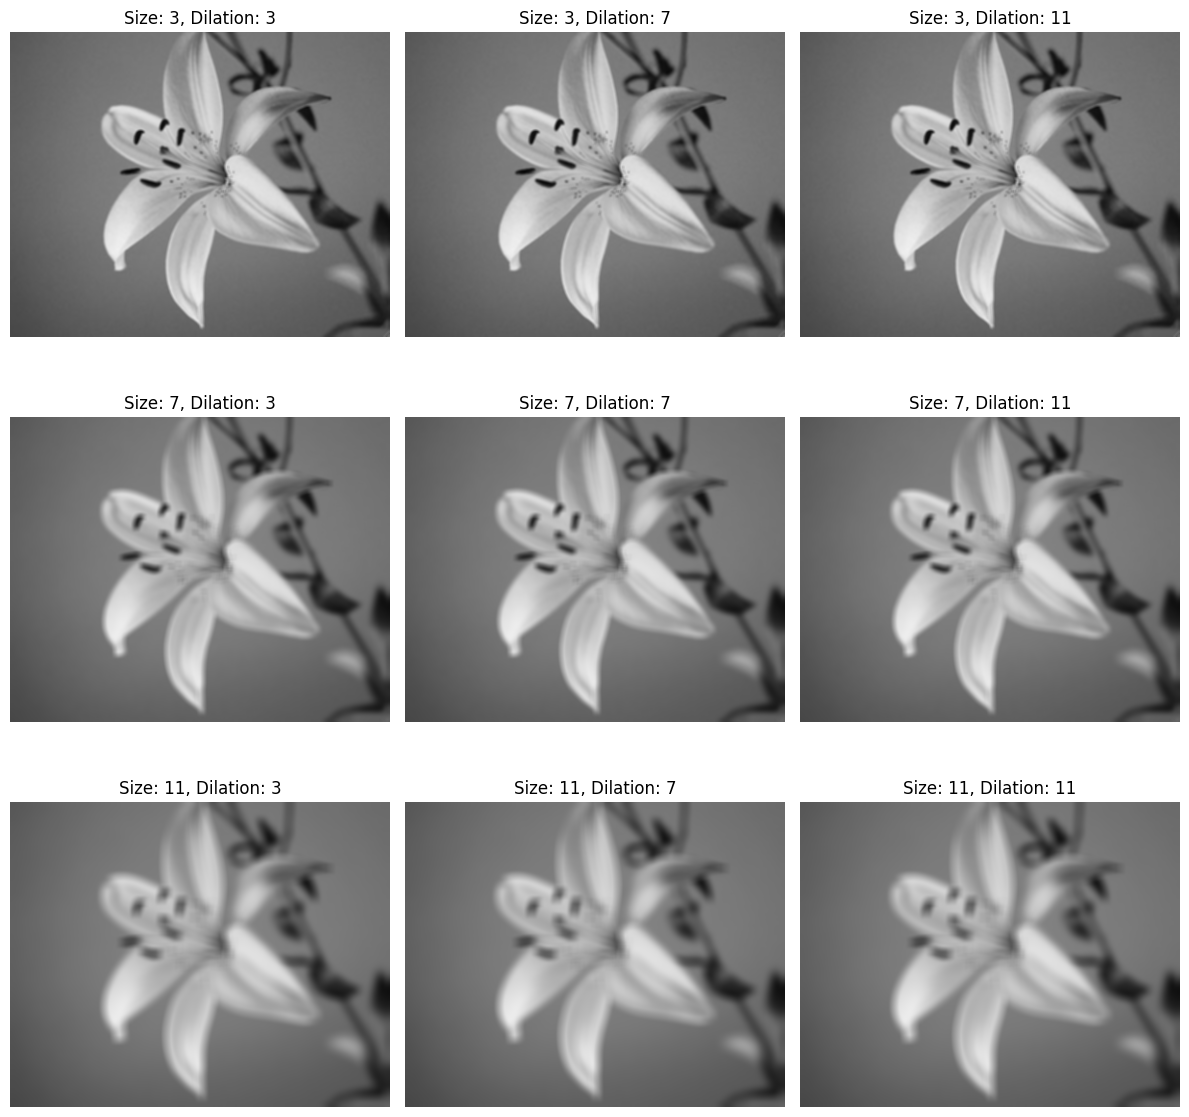

In [22]:
image = plt.imread("figs\\flower.png", cv2.IMREAD_GRAYSCALE)


filter_sizes = [3, 7, 11]
strides = [2, 5, 11]
dilations = [1, 3, 5]


filter_analysis(image, average_filter, filter_sizes)

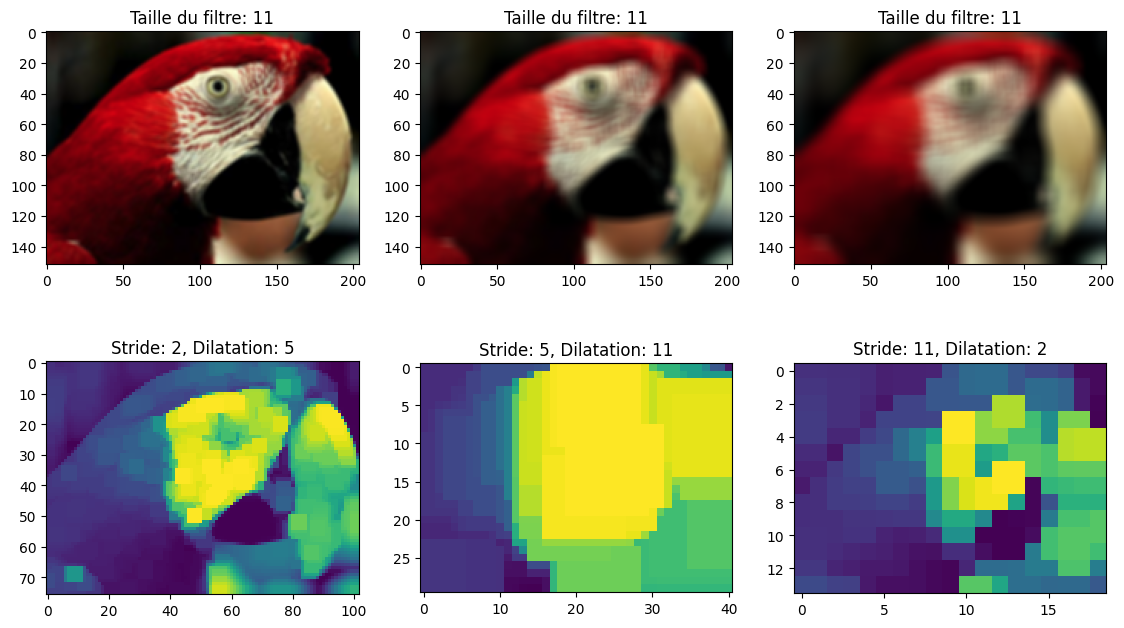

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image couleur
image = plt.imread("figs\\red_bird.png")

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Appliquer les filtres moyenneurs pour différentes valeurs de taille de filtre
filtered_images = []
for taille_filtre in [3, 7, 11]:
    filtered_image = cv2.blur(image, (taille_filtre, taille_filtre))
    filtered_images.append(filtered_image)

# Appliquer le stride et la dilatation sans padding
dilated_images = []
for stride, dilatation in [(2, 5), (5, 11), (11, 2)]:
    dilated_image = cv2.resize(
        gray_image, None, fx=1 / stride, fy=1 / stride, interpolation=cv2.INTER_NEAREST
    )
    dilated_image = cv2.dilate(
        dilated_image, np.ones((dilatation, dilatation), np.uint8), iterations=1
    )
    dilated_images.append(dilated_image)

# Afficher les images résultantes
plt.figure(figsize=(15, 10))

# Afficher les images filtrées
for i, filtered_image in enumerate(filtered_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(filtered_image)
    plt.title(f"Taille du filtre: {taille_filtre}")

# Afficher les images dilatées
for i, dilated_image in enumerate(dilated_images):
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(dilated_image)
    plt.title(
        f"Stride: {strides_dilatations[i][0]}, Dilatation: {strides_dilatations[i][1]}"
    )

plt.tight_layout()
plt.show()

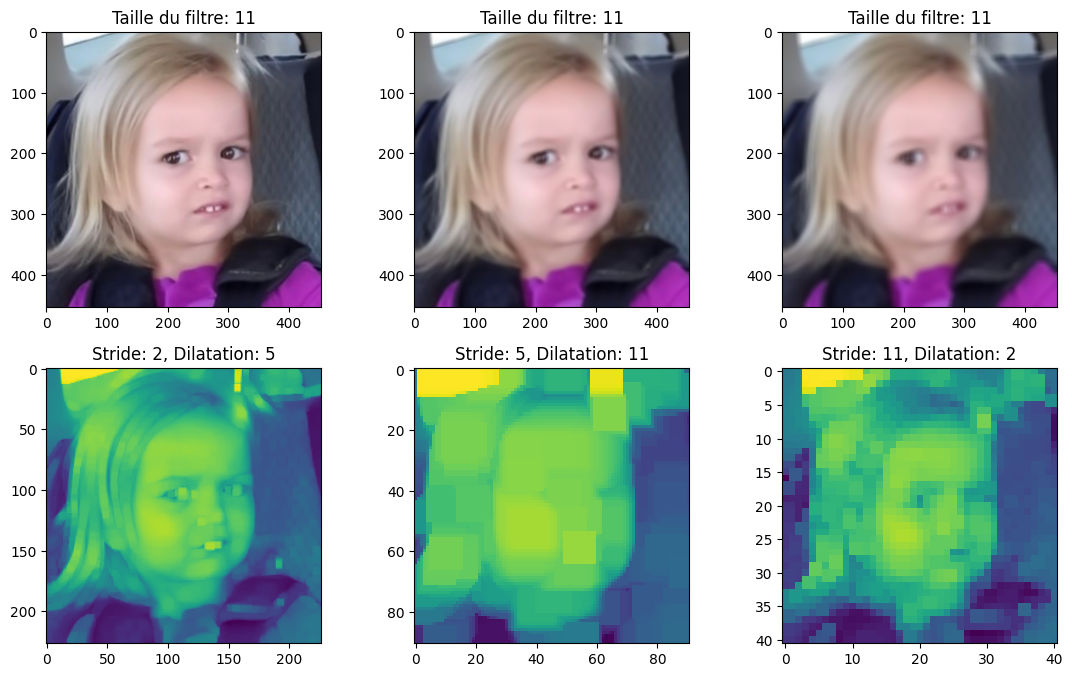

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image couleur
image = plt.imread("figs\\chloe.jpg")

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Appliquer les filtres moyenneurs pour différentes valeurs de taille de filtre
filtered_images = []
for taille_filtre in [3, 7, 11]:
    filtered_image = cv2.blur(image, (taille_filtre, taille_filtre))
    filtered_images.append(filtered_image)

# Appliquer le stride et la dilatation sans padding
dilated_images = []
for stride, dilatation in [(2, 5), (5, 11), (11, 2)]:
    dilated_image = cv2.resize(
        gray_image, None, fx=1 / stride, fy=1 / stride, interpolation=cv2.INTER_NEAREST
    )
    dilated_image = cv2.dilate(
        dilated_image, np.ones((dilatation, dilatation), np.uint8), iterations=1
    )
    dilated_images.append(dilated_image)

# Afficher les images résultantes
plt.figure(figsize=(15, 10))

# Afficher les images filtrées
for i, filtered_image in enumerate(filtered_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(filtered_image)
    plt.title(f"Taille du filtre: {taille_filtre}")

# Afficher les images dilatées
for i, dilated_image in enumerate(dilated_images):
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(dilated_image)
    plt.title(
        f"Stride: {strides_dilatations[i][0]}, Dilatation: {strides_dilatations[i][1]}"
    )

plt.tight_layout()
plt.show()

In [55]:
# apply yhe gaussian filter
from tools import gaussian_mask
from tools import Conv2D, add_padding
import cv2
import matplotlib.pyplot as plt
# ------------------------------
def apply_filter_to_single_channel(img, kernel):
    dimK = kernel.shape
    return Conv2D(
        add_padding(img, ((dimK[0] - 1) // 2, (dimK[1] - 1) // 2)), kernel
    )
def filter_analysis(img, kernel):
    """apply filtre on imageand compare between original and filtred image"""
    filtred_im = apply_filter_to_single_channel(img, kernel)
    fig, ax = plt.subplots(1, 2)
    #     ploting original img
    ax[0].imshow(img)
    ax[0].set_title("original")
    #     ploting filtred img
    ax[1].imshow(filtred_im)
    ax[1].set_title("filtred image")
# ---------------------------------
img = read_grayscale_image("figs/red_bird.png")

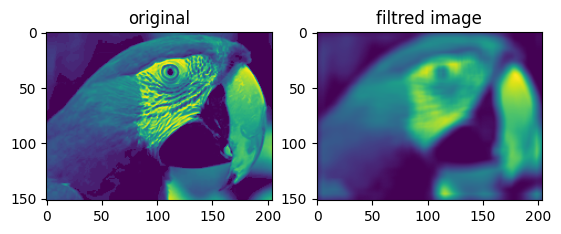

In [57]:
def average_filter(size):
    return np.ones((size, size), dtype=np.float32) / (size * size)

moy = average_filter(size=11)
gauss = average_filter(size=11)
filter_analysis(img, kernel = moy)

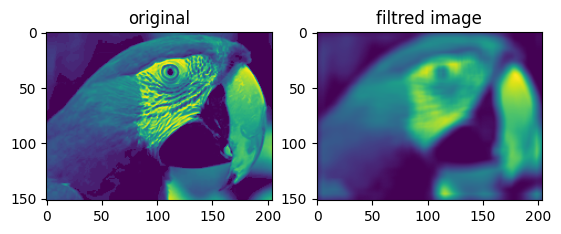

In [54]:
def average_filter(size):
    return np.ones((size, size), dtype=np.float32) / (size * size)

moy = average_filter(size=11)

gauss = average_filter(size=11)
filter_analysis(img, kernel = gauss )

In [58]:
# apply filter analysis with colored image
# -------------------------------------------
def apply_filter_to_colored_img(img, kernel):
    #     dstack build ndarray on the third axis
    return np.dstack(
        [apply_filter_to_single_channel(img[:, :, z], kernel) for z in range(3)]
    )

def filter_analysis_colored(img, kernel):
    """apply filtre on imageand compare between original and filtred image"""

    filtred_im = apply_filter_to_colored_img(img, kernel)
    fig, ax = plt.subplots(1, 2)
    #     ploting original img
    ax[0].imshow(img)
    ax[0].set_title("original")
    #     ploting filtred img
    ax[1].imshow(filtred_im)
    ax[1].set_title("filtred image")
# -----------------------


img_clr = plt.imread("figs/red_bird.png", cv2.IMREAD_UNCHANGED)


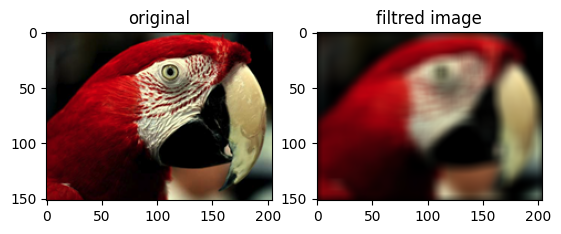

In [59]:
# appliquer le filtre moyen pour l'image en coulerus
filter_analysis_colored(img_clr, kernel = moy)

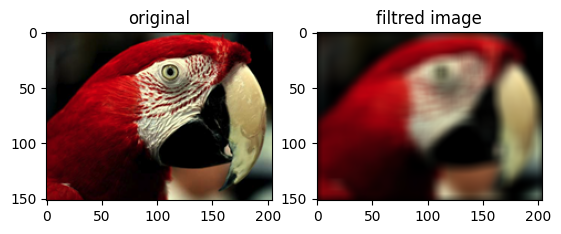

In [62]:
# Appliquer le filtre gaussien pour l'image en couleur
filter_analysis_colored(img_clr, kernel = gauss)

In [64]:
# imports
# ----------------
def get_Gx(img):
    # detects vertical edges
    #     get img conv Sx filter
    Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, +1]])
    return apply_filter_to_single_channel(img, Sx)

def get_Gy(img):
    # detects horizontal edges
    #     get img conv Sy filter
    Sy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    return apply_filter_to_single_channel(img, Sy)
# ----------------

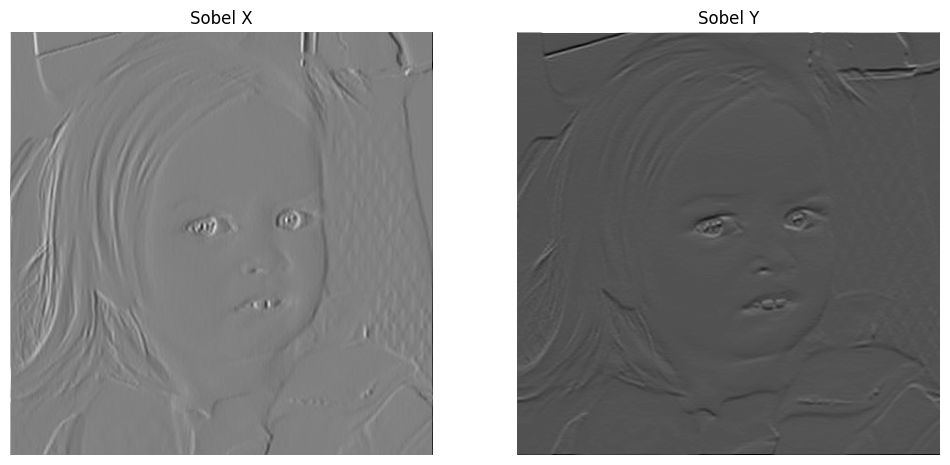

In [71]:
img_ = read_grayscale_image("figs/chloe.jpg")

sobel_x = get_Gx(img_)
sobel_y = get_Gy(img_)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(sobel_x, cmap='gray')
axes[0].set_title('Sobel X')
axes[0].axis('off')

axes[1].imshow(sobel_y, cmap='gray')
axes[1].set_title('Sobel Y')
axes[1].axis('off')

plt.show()

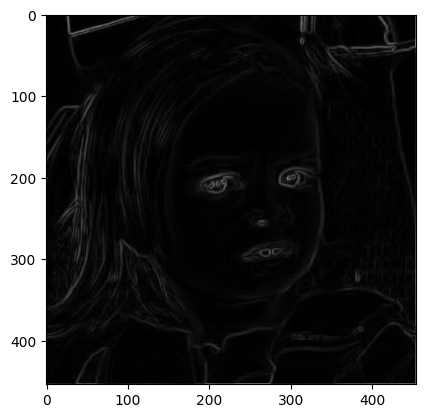

In [75]:
# apply module gradient
# --------------------
def module_grad(img):
    Gx = get_Gx(img)
    Gy = get_Gy(img)
    result = np.sqrt(Gx**2 + Gy**2)
    return result
# -----------------

module_gradient = module_grad(img_)
plt.imshow(module_gradient, cmap='gray')

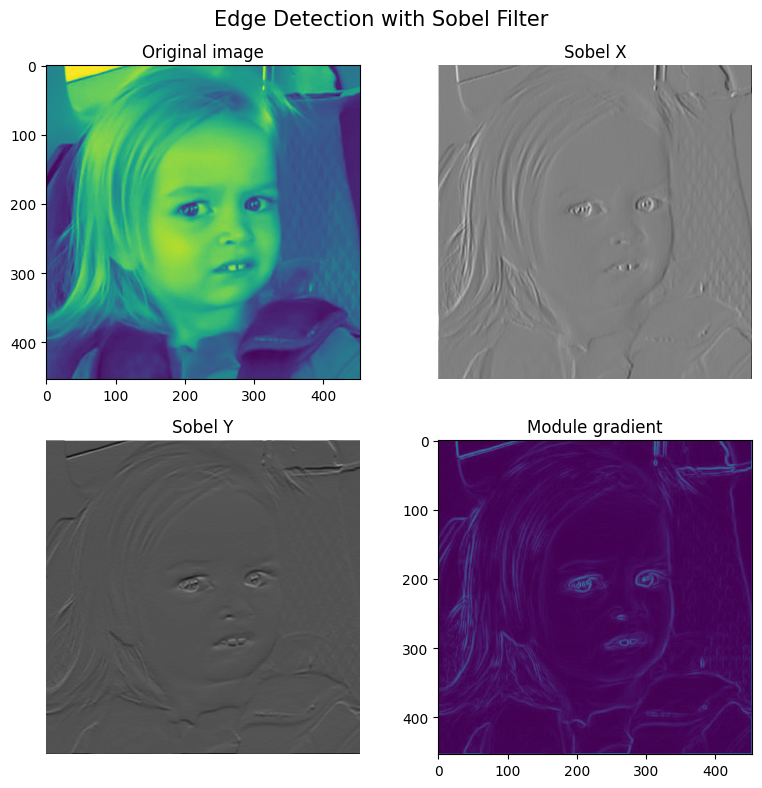

In [91]:
plt.figure(figsize=(8, 8))

# Plot original image
plt.subplot(2, 2, 1)
show_image(img_)
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 2, 4)
show_image(module_gradient)
plt.title('Module gradient')

plt.suptitle('Edge Detection with Sobel Filter', fontsize=15)
plt.tight_layout()
plt.show()

In [95]:
img__ = read_grayscale_image("figs/harold.jpeg")
module_gradient = module_grad(img__)
sobel_x = get_Gx(img__)
sobel_y = get_Gy(img__)


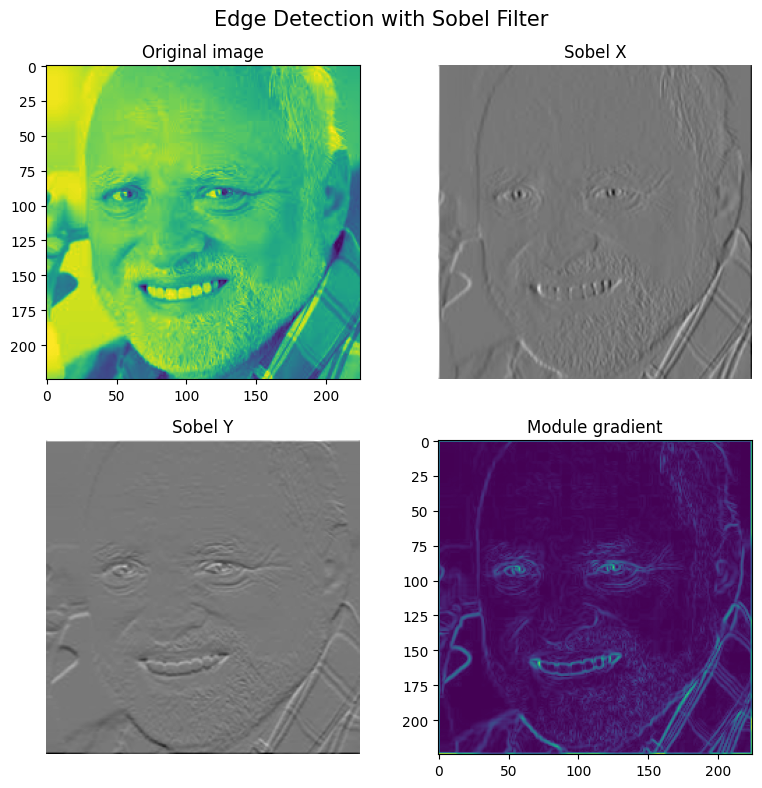

In [96]:
plt.figure(figsize=(8, 8))


# Plot original image
plt.subplot(2, 2, 1)
show_image(img__)
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 2, 4)
show_image(module_gradient)
plt.title('Module gradient')

plt.suptitle('Edge Detection with Sobel Filter', fontsize=15)
plt.tight_layout()
plt.show()

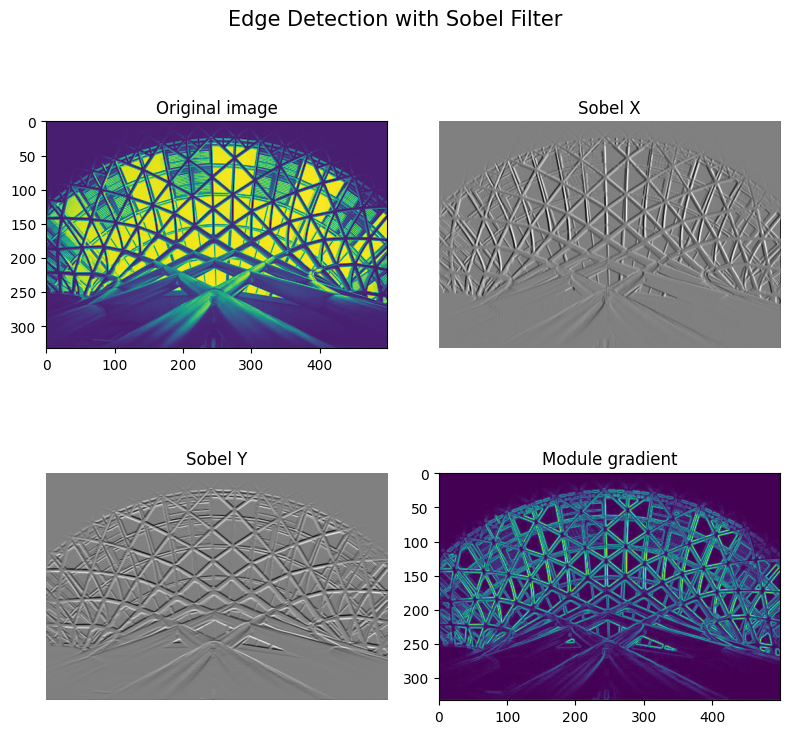

In [98]:
img___ = read_grayscale_image("figs/struct.jpeg")
module_gradient = module_grad(img___)
sobel_x = get_Gx(img___)
sobel_y = get_Gy(img___)
plt.figure(figsize=(8, 8))


# Plot original image
plt.subplot(2, 2, 1)
show_image(img___)
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 2, 4)
show_image(module_gradient)
plt.title('Module gradient')

plt.suptitle('Edge Detection with Sobel Filter', fontsize=15)
plt.tight_layout()
plt.show()


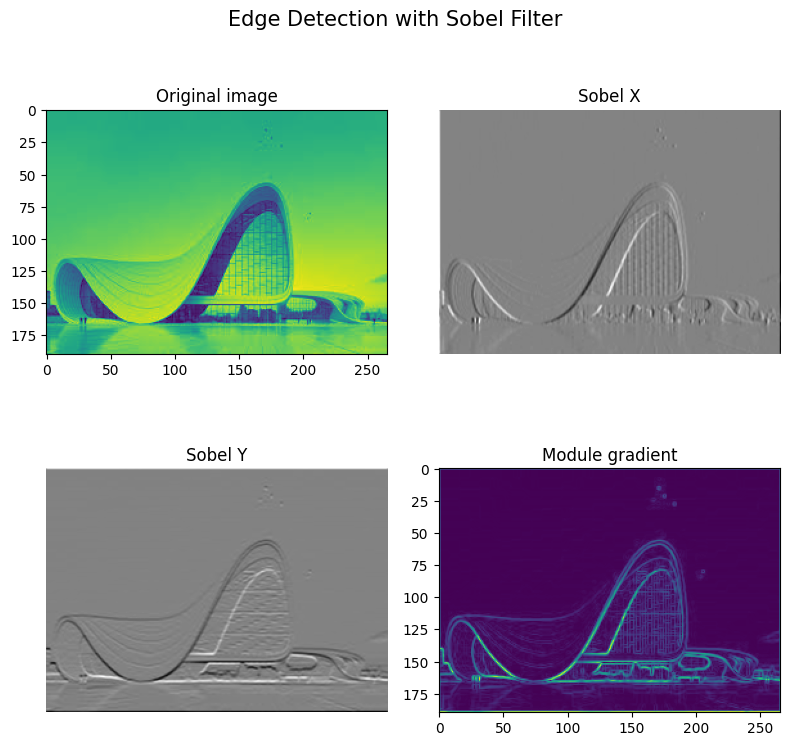

In [99]:
img___ = read_grayscale_image("figs/zaha.jpeg")
module_gradient = module_grad(img___)
sobel_x = get_Gx(img___)
sobel_y = get_Gy(img___)
plt.figure(figsize=(8, 8))


# Plot original image
plt.subplot(2, 2, 1)
show_image(img___)
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 2, 4)
show_image(module_gradient)
plt.title('Module gradient')

plt.suptitle('Edge Detection with Sobel Filter', fontsize=15)
plt.tight_layout()
plt.show()
